#<font color="green">  Part B:News Article Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading the dataset
news_df=pd.read_csv("data_news.csv")

## **Data Exploration**

In [ ]:
#first five rows of the dataset
news_df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [ ]:
#shape of the dataset
print("\nshape of the dataset:",news_df.shape)


shape of the dataset: (50000, 5)


In [ ]:
#Dataset information
print("Dataset Information:",news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB
Dataset Information: None


## **Task:1 Data Collection and Preprocessing**

In [ ]:
# Combine 'headline' and 'short_description' into a single text column.
# This gives our model more context.
news_df['text'] = news_df['headline'] + ' ' + news_df['short_description']

In [ ]:
#checking for missing values in the dataset
print("\n Missing values:")
print(news_df[['category','text']].isnull().sum())


 Missing values:
category    0
text        0
dtype: int64


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Create a list of English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
#define a function to clean the text
def clean_text(text):
  text=text.lower()  #convert text to lowercase
  text=re.sub(r'[^a-z0-9\s]',' ',text) # removing punctuations
  text=' '.join([word for word in text.split() if word not in stop_words]) #removing stop words
  return text

In [ ]:
# Applying the cleaning function to the text column
news_df['cleaned_text']=news_df['text'].apply(clean_text)

In [ ]:
#displaying original text and cleaned text
print("Original:",news_df['text'].iloc[0])
print("Cleaned:",news_df['cleaned_text'].iloc[0])

Original: 143 Miles in 35 Days: Lessons Learned Resting is part of training. I've confirmed what I sort of already knew: I'm not built for running streaks. I'm built for hard workouts three to five days a week with lots of cross training, physical therapy and foam rolling. But I've also confirmed that I'm stubborn with myself.
Cleaned: 143 miles 35 days lessons learned resting part training confirmed sort already knew built running streaks built hard workouts three five days week lots cross training physical therapy foam rolling also confirmed stubborn


## **Task-2 Feature Extraction & Exploratory Data Analysis**

In [ ]:
# Checking no. of articles in each category
category_check=news_df['category'].value_counts()
print("\n number of articles per category:")
category_check


 number of articles per category:


,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


In [ ]:
#top 10 categories
top_categories=category_check.index[:10]
top_categories

Index(['WELLNESS', 'POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'FOOD & DRINK', 'WORLD NEWS', 'BUSINESS', 'SPORTS'],
      dtype='object', name='category')

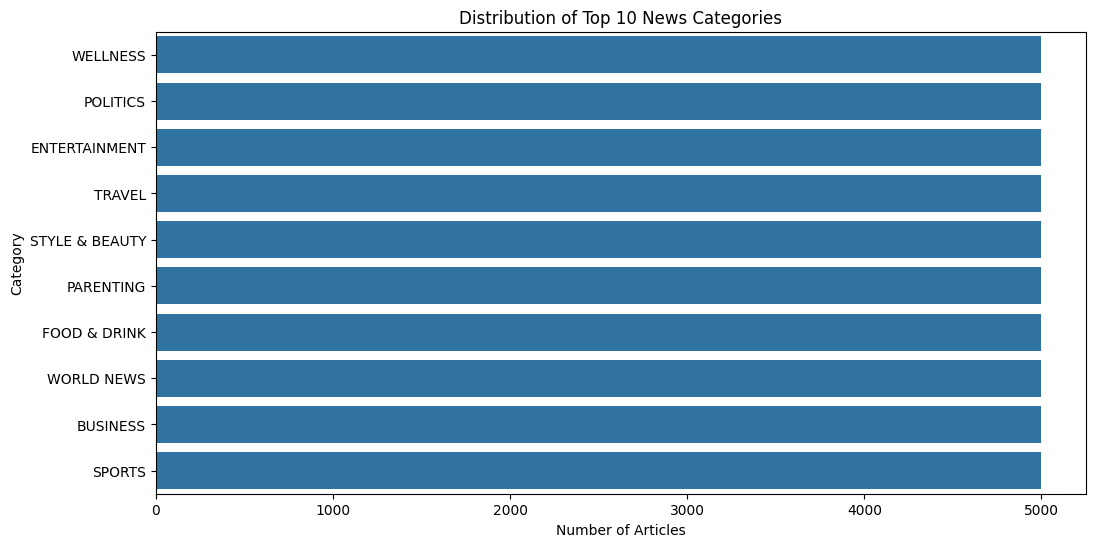

In [ ]:
# Visualizing the distribution of the top 10 categories
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=news_df, order=top_categories)
plt.title('Distribution of Top 10 News Categories')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()


In [ ]:
# For splitting the data and training models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


In [ ]:
#Feature Extraction (TF-IDF)
# Separating features
X = news_df['cleaned_text'] #feature(text)
y = news_df['category'] #target(the category)

In [ ]:
#splitting the data into trainign and testing set
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#Initialize TF-IDF vectorizer
Tfidf_Vectorizer=TfidfVectorizer(max_features=5000) #considering only 5000 most frequent words

In [ ]:
#fitting the vectorizer on the training data
X_train_tfidf=Tfidf_Vectorizer.fit_transform(X_train)

In [ ]:
#transforming test data
X_test_tfidf=Tfidf_Vectorizer.transform(X_test) #Using only tranform on the test data to prevent the model from cheating

In [ ]:
#checking the shape of the training and testing matrix
print(f"\nShape of tf-idf training matrix:{X_train_tfidf.shape}")
print(f"\nShape of tf-idf testing matrix:{X_test_tfidf.shape}")


Shape of tf-idf training matrix:(40000, 5000)

Shape of tf-idf testing matrix:(10000, 5000)


##**Task-3 Model Training and development**

In [ ]:
 #For evaluating the models
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
#Initializing the models
log_reg=LogisticRegression(max_iter=1000)
naive_bayes=MultinomialNB()
SVC=LinearSVC()

In [ ]:
#Training the models
print("\nLogistic Regression Model:")
log_reg.fit(X_train_tfidf,y_train)




Logistic Regression Model:


LogisticRegression(max_iter=1000)

In [ ]:
#Training naive bayes model
print("\nNaive BayesModel:")
naive_bayes.fit(X_train_tfidf,y_train)




Naive BayesModel:


MultinomialNB()

In [ ]:
#Training Linear SVM model
print("\nLinear SVM Model:")
SVC.fit(X_train_tfidf,y_train)


Linear SVM Model:


LinearSVC()

##**Model Evaluation**

In [ ]:
#Making Prediction
y_pred_log_reg=log_reg.predict(X_test_tfidf)
y_pred_nb=naive_bayes.predict(X_test_tfidf)
y_pred_LSVM=SVC.predict(X_test_tfidf)



In [ ]:
#Evaluating each model

#Logistic Regression Evaluation
accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
print("\nLogistc Regression Model:")
print(f"\nAccuracy:{accuracy_log_reg:.4f}")
print(" Classification Report")
print(classification_report(y_test,y_pred_log_reg))
print("\nConfusion Matrix:",confusion_matrix(y_test,y_pred_log_reg))


Logistc Regression Model:

Accuracy:0.7950
 Classification Report
                precision    recall  f1-score   support

      BUSINESS       0.74      0.77      0.75      1000
 ENTERTAINMENT       0.76      0.77      0.77      1000
  FOOD & DRINK       0.84      0.85      0.85      1000
     PARENTING       0.77      0.77      0.77      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.88      0.89      0.89      1000
STYLE & BEAUTY       0.88      0.84      0.86      1000
        TRAVEL       0.80      0.79      0.79      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.80      0.78      0.79      1000

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000



In [ ]:
#Multinomial Naive Bayes Evaluation
accuracy_nb=accuracy_score(y_test,y_pred_nb)
print("\nMultinomial Naive Bayes Model:")
print(f"\nAccuracy:{accuracy_nb:.4f}")
print(" Classification Report")
print(classification_report(y_test,y_pred_nb))


Multinomial Naive Bayes Model:

Accuracy:0.7813
 Classification Report
                precision    recall  f1-score   support

      BUSINESS       0.75      0.71      0.73      1000
 ENTERTAINMENT       0.78      0.76      0.77      1000
  FOOD & DRINK       0.80      0.86      0.83      1000
     PARENTING       0.70      0.76      0.73      1000
      POLITICS       0.77      0.73      0.75      1000
        SPORTS       0.88      0.84      0.86      1000
STYLE & BEAUTY       0.87      0.82      0.84      1000
        TRAVEL       0.76      0.79      0.78      1000
      WELLNESS       0.72      0.74      0.73      1000
    WORLD NEWS       0.79      0.79      0.79      1000

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



In [ ]:
#Linear SVM model Evaluation
accuracy_SVC=accuracy_score(y_test,y_pred_LSVM)
print("\nLinear SVM Model:")
print(f"\nAccuracy:{accuracy_SVC:.4f}")
print(" Classification Report")
print(classification_report(y_test,y_pred_LSVM))


Linear SVM Model:

Accuracy:0.7891
 Classification Report
                precision    recall  f1-score   support

      BUSINESS       0.75      0.79      0.77      1000
 ENTERTAINMENT       0.77      0.76      0.76      1000
  FOOD & DRINK       0.82      0.84      0.83      1000
     PARENTING       0.75      0.76      0.75      1000
      POLITICS       0.76      0.73      0.74      1000
        SPORTS       0.87      0.91      0.89      1000
STYLE & BEAUTY       0.85      0.84      0.85      1000
        TRAVEL       0.78      0.77      0.77      1000
      WELLNESS       0.73      0.73      0.73      1000
    WORLD NEWS       0.79      0.76      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



In [ ]:
#Comparison and conclusion
print("\nConclusion")
print("Comparing the F1-Scores (macro avg) of the models:")
print(f"Logistic Regression: {classification_report(y_test, y_pred_log_reg, output_dict=True)['macro avg']['f1-score']:.4f}")
print(f"Naive Bayes: {classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['f1-score']:.4f}")
print(f"Linear SVM: {classification_report(y_test, y_pred_LSVM, output_dict=True)['macro avg']['f1-score']:.4f}")



Conclusion
Comparing the F1-Scores (macro avg) of the models:
Logistic Regression: 0.7953
Naive Bayes: 0.7815
Linear SVM: 0.7887


 ## <font color=brown> Key Findings
*   Logistic Regression achieved the highest overall accuracy (79.50%) and F1-score (0.7953)
* Linear SVM showed slightly better performance than Naive Bayes
*   All models performed consistently well on sports and lifestyle categories
*   Wellness and parenting categories were most challenging across all models





Video Link : https://drive.google.com/file/d/11k_KB0BSOvxlW9M1JgYxGVWDjMHJD2Vh/view?usp=sharing
